In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Charger les données
data = pd.read_csv("data.csv")
data['datetime'] = pd.to_datetime(data['datetime'])
data.sort_values(by='datetime', inplace=True)
data.set_index('datetime', inplace=True)


# Initialiser un scaler MinMaxScaler
scaler = MinMaxScaler()

X = data.drop("TARGET", axis=1)
X = X[:-1]
Y = data['TARGET']



# Initialiser un modèle de régression linéaire
LR = LinearRegression()

test_size = 0.2

train_size = int(len(X) * (1-test_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]



LR.fit(X_train, Y_train)

Y_pred = LR.predict(X_test)

# Calculer et afficher le RMSE
RMSE = np.sqrt(mean_squared_error(Y_pred, predicted))
print("Root Mean Squared Error (RMSE):", RMSE)

ValueError: Found input variables with inconsistent numbers of samples: [11528, 57640]

In [18]:
len(Y_pred)==len(X_test["close_cac"])

True

In [19]:
predicted_variation = []
for i in Y_pred:
  predicted_variation.append(i)

PRICE = []
for i in X_test["close_cac"]:
  PRICE.append(i)

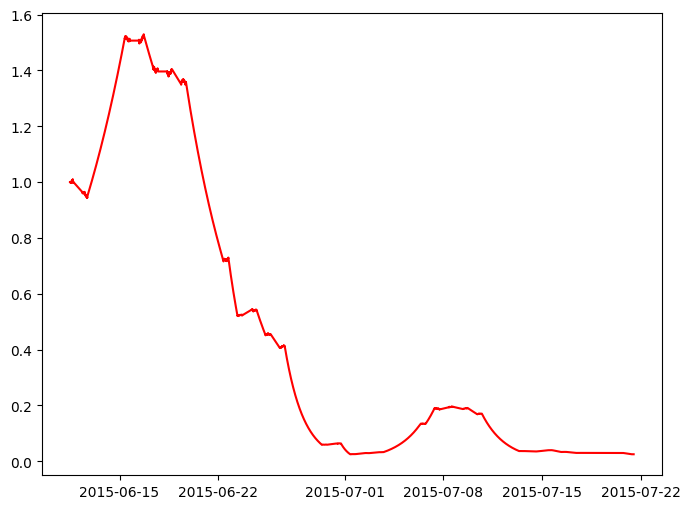

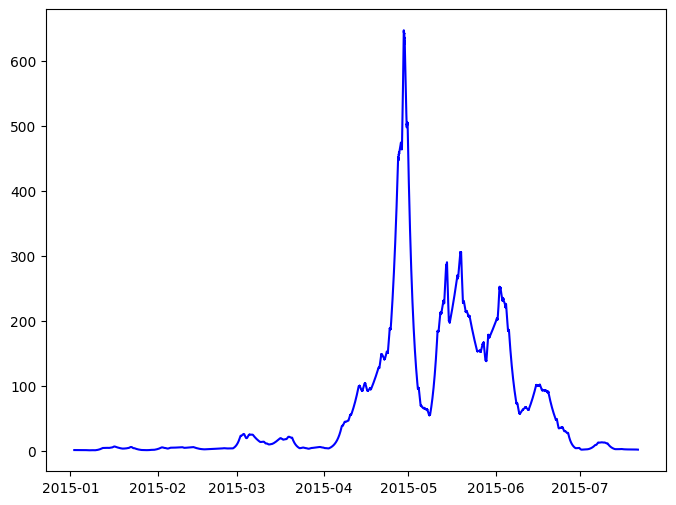

In [20]:
#comparaison predit vs reel
predicted = pd.DataFrame(Y)
plt.plot(np.exp(Y_test).cumprod(), 'r')
plt.show()
plt.plot(np.exp(predicted).cumprod(), 'b')
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

In [21]:
balance = 0
in_position = False
for i in range(len(predicted_variation) - 1):
    next_var = predicted_variation[i + 1]
    current_price = PRICE[i]

    if next_var > 0 and not in_position:
        print("------")
        print('buy @',current_price)
        print("------")
        balance -= current_price
        in_position = True
    elif next_var < 0 and in_position:

        balance += current_price
        in_position = False
        print("------")
        print('sell @',current_price)
        print("------")

if in_position:
    balance += predicted_variation[-1]

print("Final balance after backtesting:", balance)


------
buy @ 4899.0
------
------
sell @ 4850.0
------
------
buy @ 4803.0
------
------
sell @ 4798.0
------
------
buy @ 4789.0
------
------
sell @ 4789.0
------
------
buy @ 4789.0
------
------
sell @ 4789.0
------
------
buy @ 4789.0
------
------
sell @ 4789.0
------
------
buy @ 4789.0
------
------
sell @ 4789.0
------
------
buy @ 4778.0
------
------
sell @ 4736.0
------
------
buy @ 4716.0
------
------
sell @ 4752.0
------
------
buy @ 4754.0
------
------
sell @ 4751.0
------
------
buy @ 4752.0
------
------
sell @ 4796.0
------
------
buy @ 4951.0
------
------
sell @ 4965.0
------
------
buy @ 4966.0
------
------
sell @ 4978.0
------
------
buy @ 4959.0
------
------
sell @ 4956.0
------
------
buy @ 4937.0
------
------
sell @ 4994.0
------
------
buy @ 5046.0
------
------
sell @ 5053.0
------
------
buy @ 5048.0
------
------
sell @ 5048.0
------
------
buy @ 5048.0
------
------
sell @ 5048.0
------
------
buy @ 5048.0
------
------
sell @ 5048.0
------
------
buy

In [23]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

num_stamps = len(predicted_variation)
X = []
y = []

for i in range(num_stamps - 5):
    feature_vector = predicted_variation[i:i+5]
    max_return_index = np.argmax(predicted_variation[i+1:i+6])
    label = 1 if predicted_variation[i + max_return_index + 1] > 0 else 0
    X.append(feature_vector)
    y.append(label)


decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X, y)

balance = 0
in_position = False

for i in range(num_stamps - 5):
    feature_vector = predicted_variation[i:i+5]


    decision = decision_tree.predict([feature_vector])[0]

    if decision == 1 and not in_position:
        current_price = PRICE[i]
        print("------")
        print('buy @', current_price)
        print("------")
        balance -= current_price
        in_position = True
    elif decision == 0 and in_position:
        current_price = PRICE[i]
        balance += current_price
        in_position = False
        print("------")
        print('sell @', current_price)
        print("------")


if in_position:
    final_price = PRICE[num_stamps - 1]
    balance += final_price

print("Final balance after backtesting:", balance)


------
buy @ 4868.0
------
------
sell @ 4850.0
------
------
buy @ 4814.0
------
------
sell @ 4798.0
------
------
buy @ 4789.0
------
------
sell @ 4789.0
------
------
buy @ 4789.0
------
------
sell @ 4789.0
------
------
buy @ 4789.0
------
------
sell @ 4789.0
------
------
buy @ 4789.0
------
------
sell @ 4752.0
------
------
buy @ 4750.0
------
------
sell @ 4796.0
------
------
buy @ 4943.0
------
------
sell @ 4965.0
------
------
buy @ 4959.0
------
------
sell @ 4978.0
------
------
buy @ 4950.0
------
------
sell @ 4956.0
------
------
buy @ 4947.0
------
------
sell @ 4994.0
------
------
buy @ 5047.0
------
------
sell @ 5053.0
------
------
buy @ 5048.0
------
------
sell @ 5048.0
------
------
buy @ 5048.0
------
------
sell @ 5048.0
------
------
buy @ 5051.0
------
------
sell @ 5072.0
------
------
buy @ 5000.0
------
------
sell @ 5016.0
------
------
buy @ 5019.0
------
------
sell @ 5059.0
------
------
buy @ 5064.0
------
------
sell @ 5083.0
------
------
buy